# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Test, Test
 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice.
Number_of_mice = len(combined_data["Mouse ID"].unique())
Number_of_mice

249

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_values = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_values

array(['g989'], dtype=object)

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicated_values)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume" : mean,
                         "Median Tumor Volume" : median,
                          "Var Tumor Volume" : var,
                          "STD Tumor Volume" : std,
                          "SEM Tumor Volume" : SEM})

summary_df




,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

TypeError: 'str' object is not callable

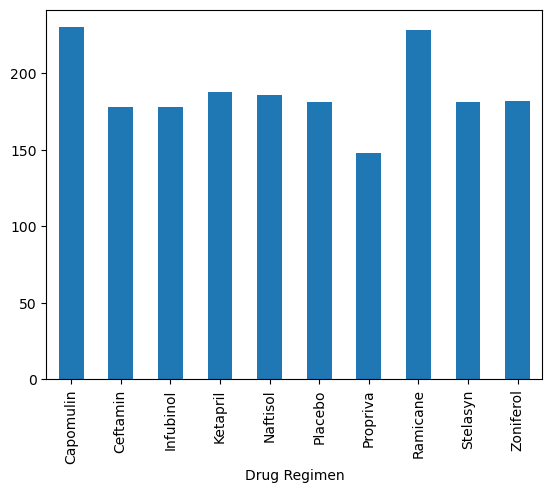

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
drug_and_timepoints.plot(kind="bar")
plt.ylabel("Total Mice Tested")
plt.show()


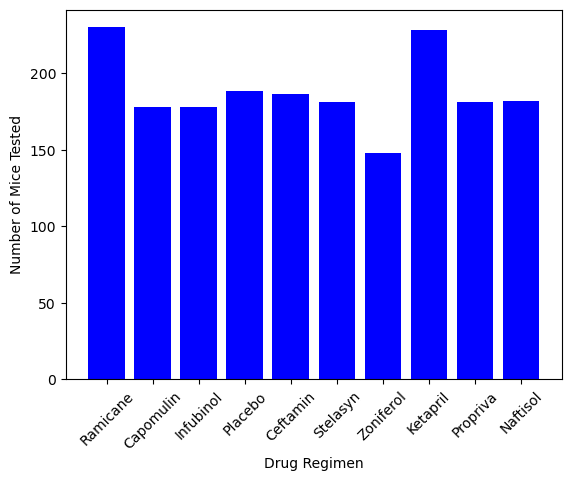

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(x_axis, y_axis, color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=45)
plt.show()



<AxesSubplot:ylabel='Sex'>

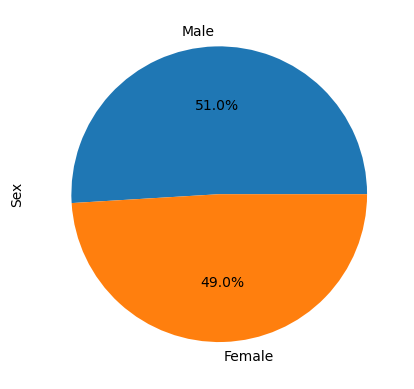

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = clean_df["Sex"].value_counts()
pie_df
male = 958/len(clean_df)
male
female = 922/len(clean_df)
female
labels = ["Male", "Female"]
x_axis = [{male}, {female}]
pie_df.plot(kind="pie", labels=labels, autopct="%1.1f%%")

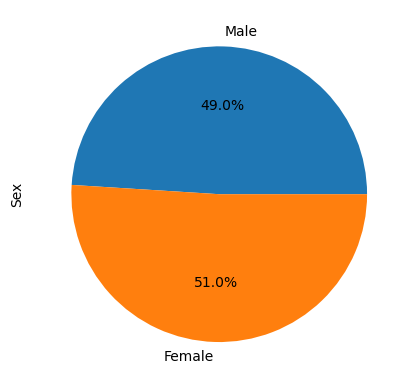

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df["Sex"].unique()
x_sizes = [49, 51]
plt.pie(x_sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"].sum()
Capomulin


9355.42046243

## Line and Scatter Plots

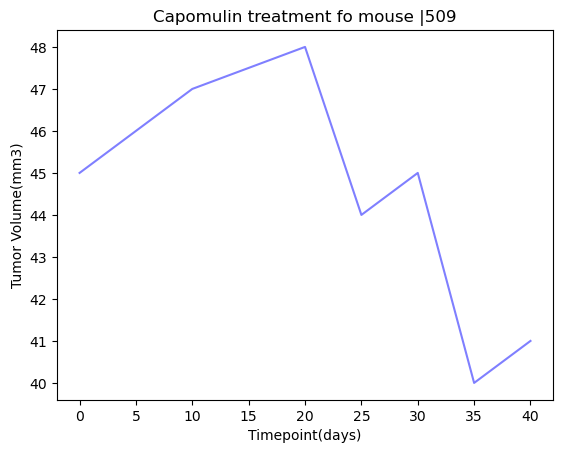

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = [0, 10, 20, 25, 30, 35, 40]
y_axis = [45, 47, 48, 44, 45, 40, 41]
plt.plot(x_axis, y_axis, color='b', alpha=0.5)

plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Capomulin treatment fo mouse |509")
plt.show()



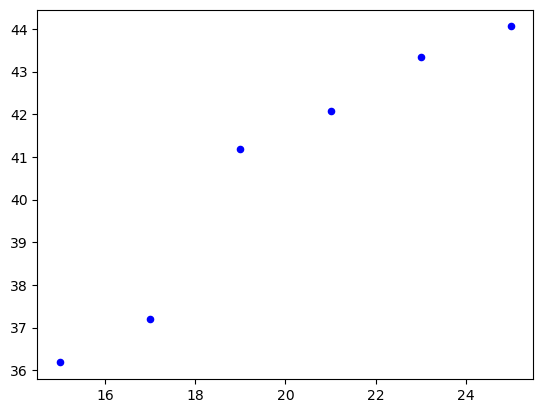

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulindf_for_scatterplot = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Weight (g)"])]
Capomulindf_for_scatterplot = Capomulindf_for_scatterplot[["Weight (g)", "Tumor Volume (mm3)"]]
grouped_Capomulindf_for_scatterplot = Capomulindf_for_scatterplot.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
grouped_Capomulindf_for_scatterplot
x_axis = [15, 17, 19, 21, 23, 25]
y_axis = [36.18, 37.21, 41.18, 42.08, 43.34, 44.06]
plt.scatter(x_axis, y_axis, s=20, color='blue')







## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


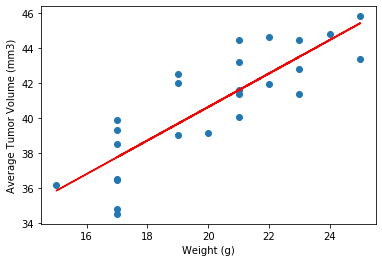

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


